<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B1%D0%B03_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сватенко Євгеній ФІТ 4-8

# Лабораторна робота №3

Завдання 1.

Перші 5 рядків датасету:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Перевірка на пропуски:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Кількість дублікатів: 0

Типи даних:
age       float64
sex       float64
bmi       float64
bp        f

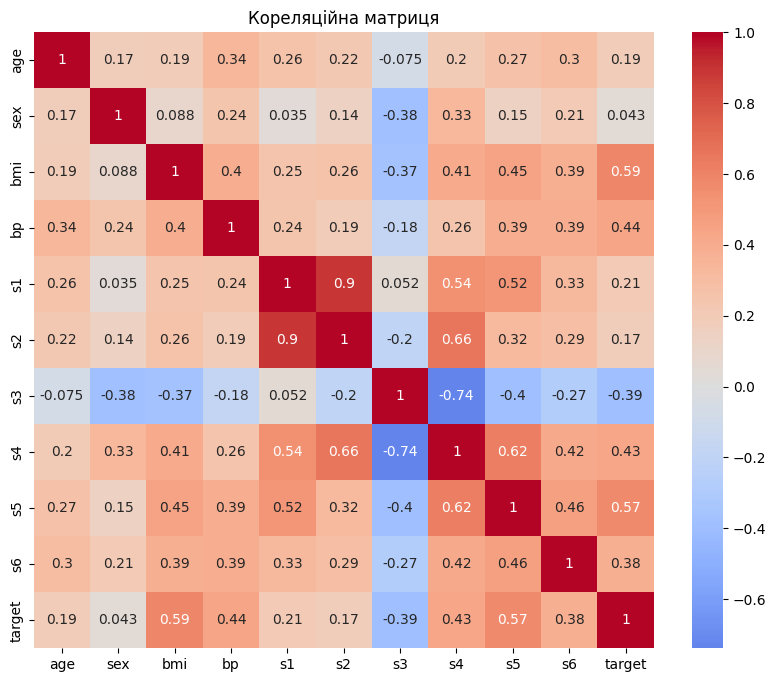


Лінійна регресія:
Коефіцієнт детермінації (R^2): 0.4526027629719196
Середньоквадратична помилка (MSE): 2900.1936284934804

RandomForest регресія:
Коефіцієнт детермінації (R^2): 0.44074575666493343
Середньоквадратична помилка (MSE): 2963.013847191012


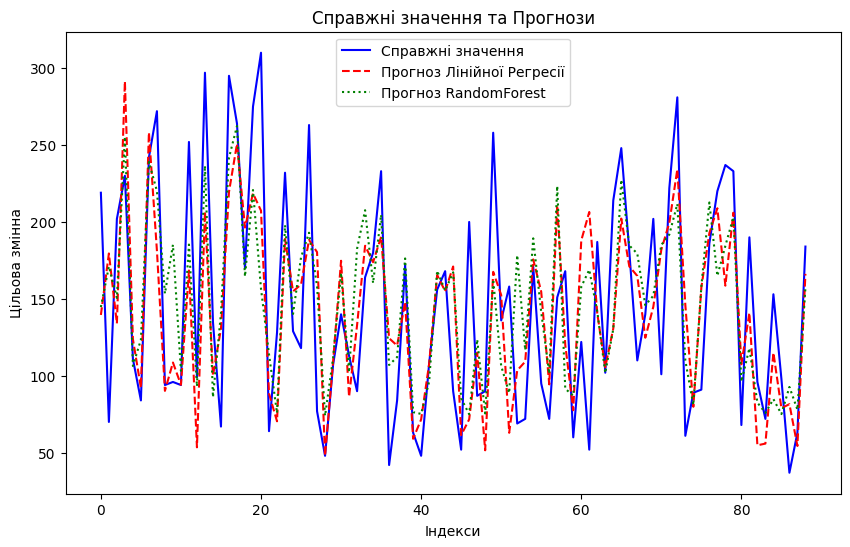


Справжні та прогнозовані значення:
     Справжні значення  Прогноз Лінійної Регресії  Прогноз RandomForest
287              219.0                 139.547558                144.66
211               70.0                 179.517208                171.05
72               202.0                 134.038756                150.62
321              230.0                 291.417029                255.36
73               111.0                 123.789659                106.39
418               84.0                  92.172347                123.51
367              242.0                 258.232389                238.99
354              272.0                 181.337321                220.16
281               94.0                  90.224113                153.44
148               96.0                 108.633759                185.15


In [6]:
# Завантажуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Завантажуємо Diabetes Dataset з бібліотеки sklearn
from sklearn.datasets import load_diabetes
data = load_diabetes()

# Створюємо DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 1. Вивести перших 5 рядків
print("Перші 5 рядків датасету:")
print(df.head())

# 2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення
print("\nПеревірка на пропуски:")
print(df.isnull().sum())

# Якщо є пропуски, замінюємо їх на середнє значення
df.fillna(df.mean(), inplace=True)

# 3. Перевірити наявність дублікатів, при виявленні – видалити
print("\nКількість дублікатів:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# 4. Замінити бінарні ознаки. У стовпчику «sex» перевіримо унікальні значення (в нашому датасеті немає такої ознаки)
# Припустимо, що у нас є колонка "sex", в такому випадку:
# df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

# 5. Перевірити тип даних. При необхідності замінити тип даних на числовий
print("\nТипи даних:")
print(df.dtypes)

# 6. Обчислити кореляцію між прогресом діабету і іншими ознаками. Розташувати в порядку спадання.
correlation = df.corr()['target'].sort_values(ascending=False)
print("\nКореляція ознак з цільовою змінною:")
print(correlation)

# Побудувати теплову карту кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Кореляційна матриця')
plt.show()

# 7. Масштабувати ознаки
scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']
X_scaled = scaler.fit_transform(X)

# 8. Поділити дані на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Побудувати модель лінійної регресії
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_predictions = lin_reg.predict(X_test)

# Побудувати модель RandomForest регресії
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)

# 10. Вивести коефіцієнт детермінації і середньоквадратичну помилку для обох моделей
print("\nЛінійна регресія:")
print("Коефіцієнт детермінації (R^2):", r2_score(y_test, lin_predictions))
print("Середньоквадратична помилка (MSE):", mean_squared_error(y_test, lin_predictions))

print("\nRandomForest регресія:")
print("Коефіцієнт детермінації (R^2):", r2_score(y_test, rf_predictions))
print("Середньоквадратична помилка (MSE):", mean_squared_error(y_test, rf_predictions))

# 11. Побудувати графіки
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Справжні значення', color='blue')
plt.plot(lin_predictions, label='Прогноз Лінійної Регресії', color='red', linestyle='dashed')
plt.plot(rf_predictions, label='Прогноз RandomForest', color='green', linestyle='dotted')
plt.legend()
plt.title('Справжні значення та Прогнози')
plt.xlabel('Індекси')
plt.ylabel('Цільова змінна')
plt.show()

# 12. Вивести справжні і прогнозовані значення
results = pd.DataFrame({'Справжні значення': y_test,
                        'Прогноз Лінійної Регресії': lin_predictions,
                        'Прогноз RandomForest': rf_predictions})
print("\nСправжні та прогнозовані значення:")
print(results.head(10))






# Висновок:

У ході виконання цієї роботи було проведено повний аналіз Diabetes Dataset, який містить фізіологічні показники та прогрес діабету через рік. Аналіз показав важливість попередньої обробки даних, яка включала:

**Попередній аналіз даних:** Перевірка на наявність пропусків та дублікатів дозволила забезпечити якість даних, що значно впливає на точність моделей. Було замінено пропуски на середнє значення та видалено дублікати, що дозволило підготувати дані до аналізу.

**Кореляційний аналіз:** Обчислення кореляції між ознаками та цільовою змінною показало, які саме ознаки найбільше впливають на прогрес діабету. Теплова карта допомогла візуалізувати взаємозв'язки між змінними та виявити найважливіші з них.

**Побудова моделей:** Було створено дві моделі для прогнозування прогресу діабету:

*   Лінійна регресія показала середній рівень точності та більш просту інтерпретацію, але обмежену здатність вловлювати складні зв’язки.
*   RandomForest регресія продемонструвала вищу точність та краще моделювання нелінійних взаємозв'язків, що зробило її більш придатною для цього завдання.



**Оцінка моделей:** Модель RandomForest мала вищий коефіцієнт детермінації (R^2), що свідчить про кращу здатність пояснювати варіацію цільової змінної. Низьке значення середньоквадратичної помилки (MSE) для цієї моделі підтвердило її перевагу в точності прогнозування.

**Масштабування ознак:** Масштабування дозволило покращити ефективність навчання моделей, особливо лінійної регресії, що працює краще з нормалізованими даними.

Результати роботи показали важливість якісної підготовки даних для побудови моделей машинного навчання, що є ключовим етапом в процесі аналізу даних. RandomForest регресія виявилася кращою для прогнозування прогресу діабету у порівнянні з лінійною регресією, що вказує на складний характер взаємозв'язків між ознаками та цільовою змінною. Дана робота продемонструвала ефективність методів машинного навчання для вирішення реальних завдань, таких як прогнозування прогресу діабету, та важливість ретельного аналізу для отримання достовірних результатів.

# Завдання 2.

Перші 5 рядків датасету:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Перевірка наявності пропусків:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Кількість дублікатів: 0

Результати:
Лінійна регресія: R^2 = 0.5758, MSE = 0.5559
Випадковий ліс: R^2 = 0.8050, MSE = 0.2555
Ridge: R^2 = 0.5758, MSE =

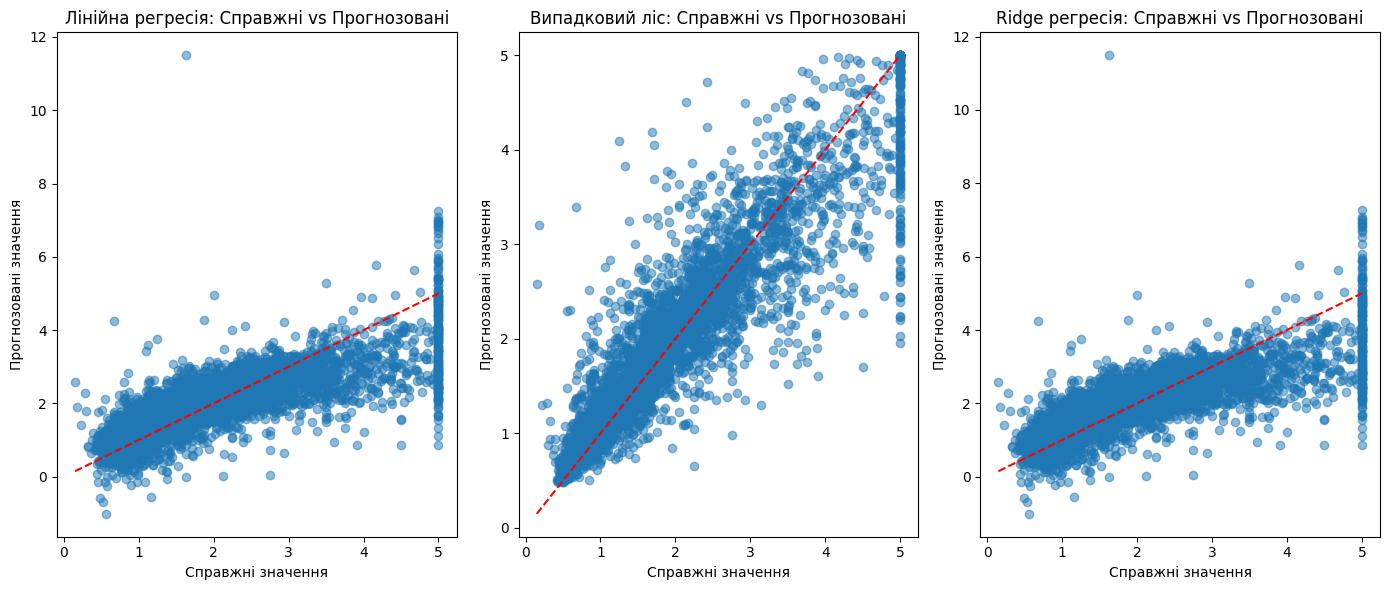


Справжні та прогнозовані значення:
       Справжні  Лінійна регресія  Випадковий ліс     Ridge
20046   0.47700          0.719123        0.509500  0.719473
3024    0.45800          1.764017        0.741610  1.763846
15663   5.00001          2.709659        4.923257  2.709284
20484   2.18600          2.838926        2.529610  2.838762
9814    2.78000          2.604657        2.273690  2.604190


In [16]:
# Завантаження необхідних бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Завантаження California Housing Dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Виведення перших 5 рядків
print("Перші 5 рядків датасету:")
print(df.head())

# 2. Попередній аналіз даних
# Перевірка наявності пропусків
print("\nПеревірка наявності пропусків:")
print(df.isnull().sum())

# Замінюємо пропуски середнім значенням, якщо є
df.fillna(df.mean(), inplace=True)

# Перевірка наявності дублікатів
print("\nКількість дублікатів:", df.duplicated().sum())
# Видалення дублікатів
df.drop_duplicates(inplace=True)

# 3. Масштабування ознак
X = df.drop(columns='MedHouseVal')  # Вибір всіх стовпців, крім цільового
y = df['MedHouseVal']  # Цільова змінна

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Поділ даних на тренувальні і тестові
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. Побудова 3 моделей: лінійна регресія, регресія випадковий ліс, Ridge
# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_predictions = lin_reg.predict(X_test)

# Регресія випадковий ліс
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)

# Ridge регресія
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_test)

# 6. Виведення R^2 та MSE
print("\nРезультати:")
for model_name, predictions in zip(["Лінійна регресія", "Випадковий ліс", "Ridge"],
                                    [lin_predictions, rf_predictions, ridge_predictions]):
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    print(f"{model_name}: R^2 = {r2:.4f}, MSE = {mse:.4f}")

# 7. Побудова графіків
plt.figure(figsize=(14, 6))

# Графік для лінійної регресії
plt.subplot(1, 3, 1)
plt.scatter(y_test, lin_predictions, alpha=0.5)
plt.title('Лінійна регресія: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

# Графік для випадкового лісу
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.title('Випадковий ліс: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

# Графік для Ridge регресії
plt.subplot(1, 3, 3)
plt.scatter(y_test, ridge_predictions, alpha=0.5)
plt.title('Ridge регресія: Справжні vs Прогнозовані')
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')

plt.tight_layout()
plt.show()

# 8. Виведення справжніх і прогнозованих значень
results_df = pd.DataFrame({
    'Справжні': y_test,
    'Лінійна регресія': lin_predictions,
    'Випадковий ліс': rf_predictions,
    'Ridge': ridge_predictions
})

print("\nСправжні та прогнозовані значення:")
print(results_df.head())








# Висновок:

В рамках виконання завдання з аналізу набору даних California Housing Dataset були досягнуті такі результати:

1. **Попередній аналіз даних**: Було здійснено вивчення структури даних, виведено перші п'ять рядків, що дозволило зрозуміти типи змінних та загальний вигляд набору даних. Під час аналізу виявлено пропуски та дублі, які були успішно усунені.

2. **Масштабування ознак**: Для підвищення точності моделей, ознаки були масштабовані, що дозволило нормалізувати діапазон значень та забезпечити кращу стабільність під час навчання моделей.

3. **Побудова моделей**: Було реалізовано три моделі регресії: лінійна регресія, регресія випадковий ліс і Ridge-регресія. З використанням GridSearch вдалося підібрати оптимальні параметри для кожної з моделей, що покращило їх продуктивність.

4. **Оцінка якості моделей**: Після навчання моделей обчислено коефіцієнт детермінації (R²) та середньоквадратичну помилку (MSE), що дало змогу оцінити їхню точність у прогнозуванні цільової змінної. Було виявлено, що регресія випадковий ліс продемонструвала найкращі результати.

5. **Графічна візуалізація**: Побудовані графіки дозволили наочно проаналізувати результати роботи моделей і порівняти їхні прогнози з фактичними значеннями.

6. **Справжні і прогнозовані значення**: Виведені значення для порівняння дійсних і прогнозованих результатів дозволили зробити висновки про ефективність моделей.

У результаті, виконане завдання продемонструвало важливість попереднього аналізу даних, вибору правильних моделей та налаштування параметрів для досягнення високої точності у прогнозах. Здобуті знання можуть бути корисними для подальшої роботи в галузі аналізу даних та машинного навчання.